### Exploratory Data Analysis on Advertising 

Used Advertising dataset to analyse the area income and daily internet usage on Ad. This dataset has 10 key variable

Daily Time spend on site: Time spend on site for ad

Age: Age of people using the site

Area Income: income from ad 

Daily Internet Usage: Daily internet usage for ad

Ad Topic line: Topic line of Ad 

City: City where Ad are showing

Male: Gender value as 0 and 1. 0 is for Female and 1 is for male

Country: Country where Ad are showing

Timestamp: Date and time when Ad was appeared

Clicked on Ad: Whether people clicked on Ad or not. 0 is for NO and 1 is for YES


#### Import the Library


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

NumPy: For numerical operations and handling arrays.
    
Pandas: For data manipulation and analysis with DataFrames and Series.

Matplotlib: For creating interactive plots.

Seaborn: For statistical data visualization.

#### Load the Dataset

In [2]:
df = pd.read_csv("Copy of advertising.csv")

#### Read the Dataset

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
df.shape

(1000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


It provides a summary of the DataFrame “df”. It includes information about the DataFrame’s index, columns, data types, non-null values, and memory usage. In this data all values are non-null that means there is no null values

In [7]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [11]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!= 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype== 'O']

print("Numerical:", numerical_features)
print("categorical:", categorical_features)

Numerical: ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Clicked on Ad']
categorical: ['Ad Topic Line', 'City', 'Country', 'Timestamp']


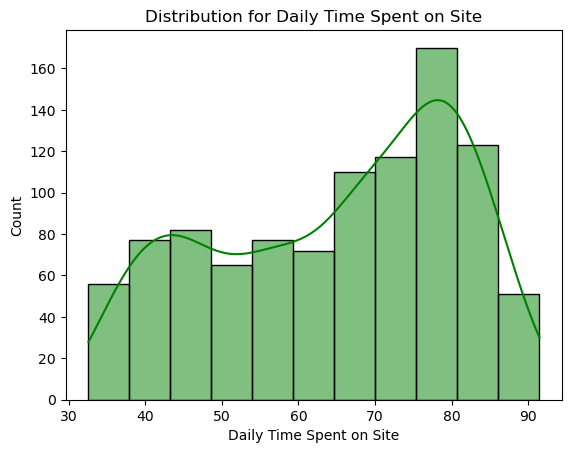

In [12]:
#Plot Distribution for Daily Time Spent on Site
sns.histplot(df['Daily Time Spent on Site'], kde = True , color = 'green')
plt.title('Distribution for Daily Time Spent on Site')
plt.show()

Here, used 

sns.histplot: Seaborn function to plot histograms

df(Daily time spent on site): To specify the data to be plotted

kde=True: To show the Kernel Density Estimate (KDE) plot, which is a smoothed line that represents the distribution

Color='green': To set the color of the bars in the histogram to orange

plt.title: To add the title to the plot

plt.show(): To display the plot

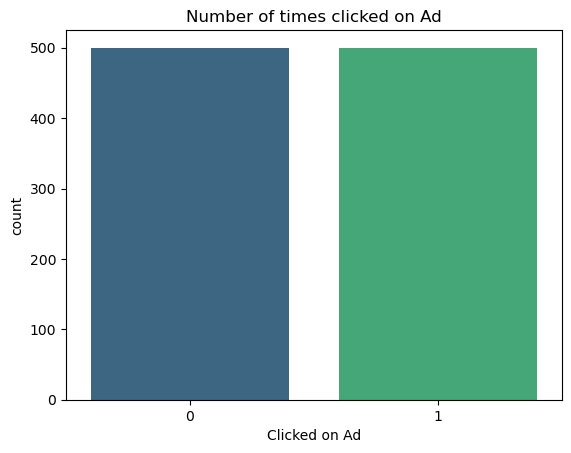

In [12]:
#Plot count for clicked on Ad
sns.countplot(x = 'Clicked on Ad', data = df, palette = 'viridis')
plt.title('Number of times clicked on Ad')
plt.show()

The dataset shows that only 50% times people clicked on Ad which appeared

sns.countplot: Seaborn function to create a count plot

data=df: To indicate the DataFrame df from which the data is taken

palette=’viridis’: To set the color palette to 'viridis', which is a color map

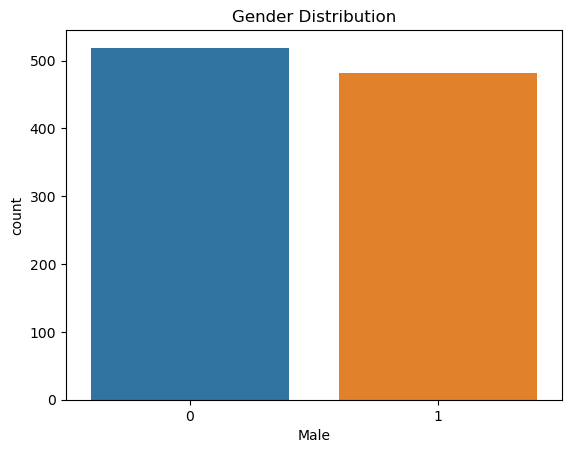

In [10]:
#Plot for Gender Distribution
sns.countplot(x= 'Male', data=df)
plt.title('Gender Distribution')
plt.show()

The dataset shows that number of Females are more than number of males 

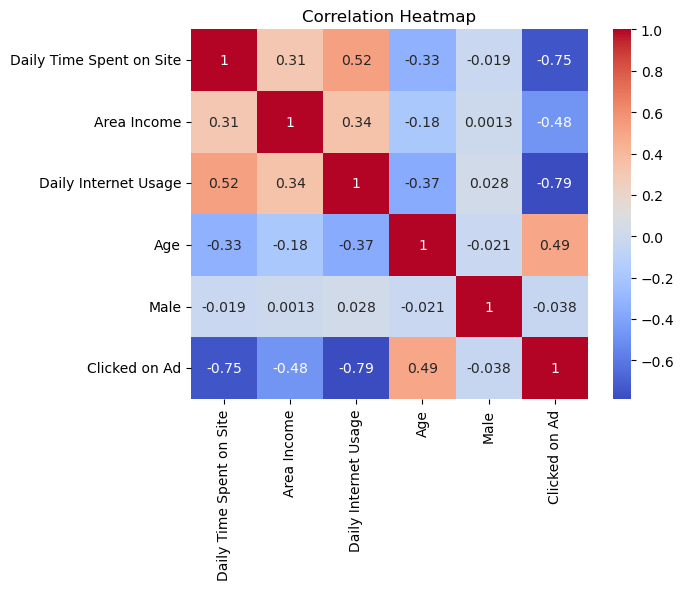

In [23]:
#Heatmap for correlation
sns.heatmap(df[['Daily Time Spent on Site','Area Income','Daily Internet Usage','Age', 'Male','Clicked on Ad']].corr(),
            annot=True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Daily Time Spent on Site shows significant correlation with Daily Internet Usage. Also, Age shows significant correlation with Clicked on Ad. Now, we will take regplot graph between Daily Time Spent on Site and Daily Internet Usage to see the correlation.

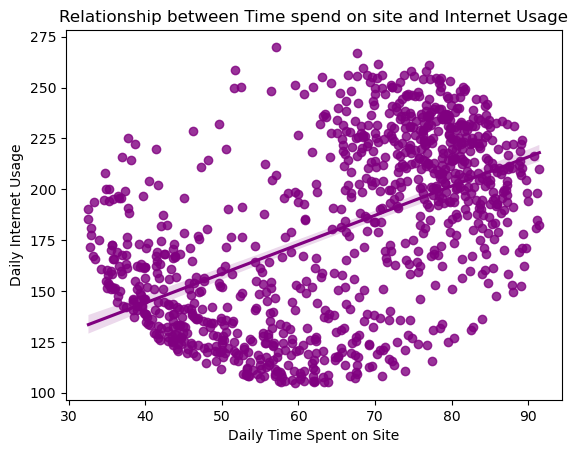

In [25]:
sns.regplot(x= 'Daily Time Spent on Site', y= 'Daily Internet Usage', data =df, color = 'purple')
plt.title('Relationship between Time spend on site and Internet Usage')
plt.show()

We can see that there is positive correlation between Time spend on site and Internet Usage. That means, the more time spent on site, there will be more internet usage. 

In [15]:
#Top 5 Ad Topic lines on basis of Income
top5_Ad = df.sort_values(by='Area Income', ascending=False).head(5)
print(top5_Ad)

     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
568                     64.51   42     79484.80                190.71   
419                     60.70   43     79332.33                192.60   
780                     67.85   41     78520.99                202.70   
273                     68.88   37     78119.50                179.58   
525                     66.14   41     78092.95                165.27   

                          Ad Topic Line                 City  Male  \
568    Virtual 5thgeneration neural-net          Edwardmouth     1   
419  Multi-tiered multi-state moderator             Mataberg     1   
780       Reactive tangible contingency          East Ronald     1   
273   Advanced 5thgeneration capability    Port Whitneyhaven     0   
525    Re-engineered impactful software  North Isabellaville     0   

            Country            Timestamp  Clicked on Ad  
568      Madagascar  2016-04-29 07:49:01              0  
419           Palau  201

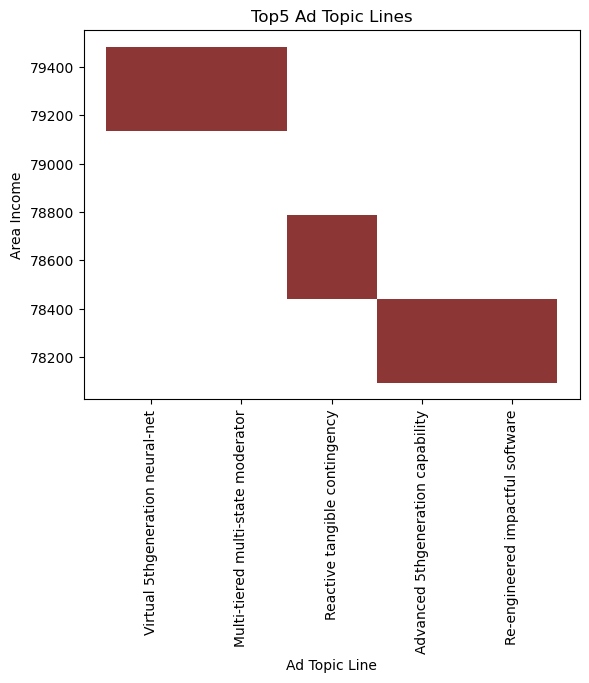

In [45]:
#Plot Distribution for Top5 Ad Topic Lines
sns.histplot(x= 'Ad Topic Line', y= 'Area Income', data = top5_Ad, color = 'red')
plt.title('Top5 Ad Topic Lines')
plt.xticks(rotation = 90)
plt.show()

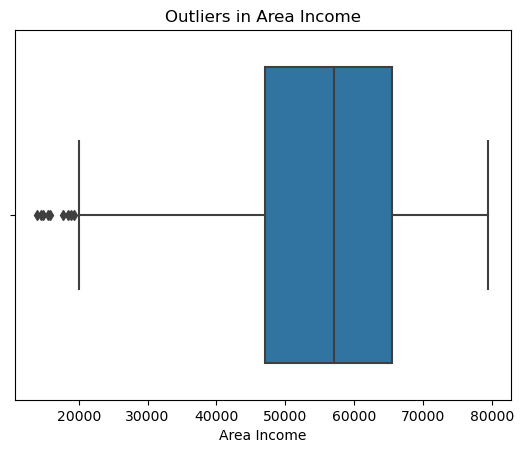

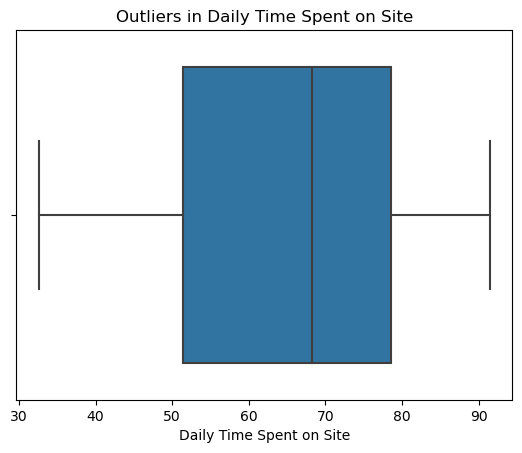

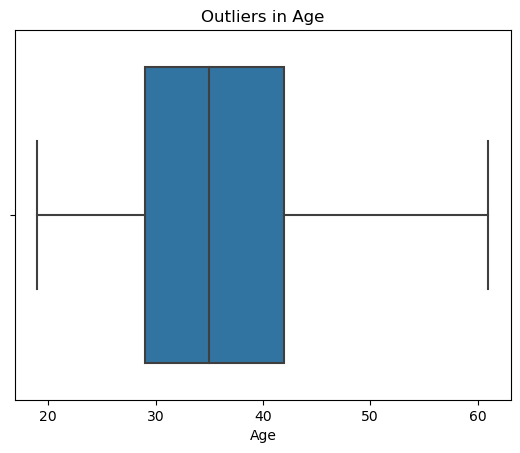

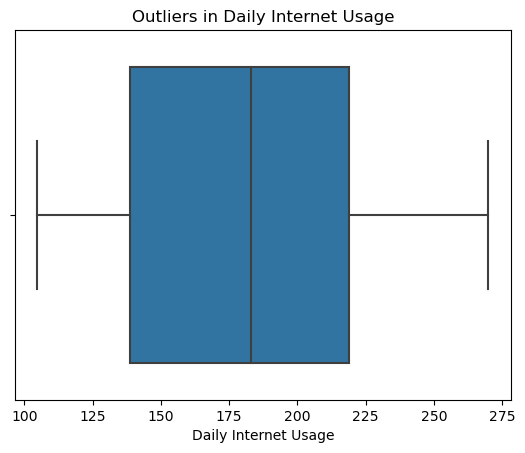

In [9]:
#Boxplot to find the outliers
sns.boxplot(x= 'Area Income', data = df)
plt.title('Outliers in Area Income')
plt.show()

sns.boxplot(x= 'Daily Time Spent on Site', data = df)
plt.title('Outliers in Daily Time Spent on Site')
plt.show()

sns.boxplot(x= 'Age', data = df)
plt.title('Outliers in Age')
plt.show()

sns.boxplot(x= 'Daily Internet Usage', data = df)
plt.title('Outliers in Daily Internet Usage')
plt.show()


Here, we can see that only "Area Income" has Outliers. Now, we will remove this outliers. 

In [13]:
# Removing outliers

def remove_outlier(df, column):
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_clean

df_cleaned = remove_outlier(df, 'Area Income')
df_cleaned = remove_outlier(df_cleaned, 'Area Income')

print(df_cleaned.info())    

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  990 non-null    float64
 1   Age                       990 non-null    int64  
 2   Area Income               990 non-null    float64
 3   Daily Internet Usage      990 non-null    float64
 4   Ad Topic Line             990 non-null    object 
 5   City                      990 non-null    object 
 6   Male                      990 non-null    int64  
 7   Country                   990 non-null    object 
 8   Timestamp                 990 non-null    object 
 9   Clicked on Ad             990 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 85.1+ KB
None


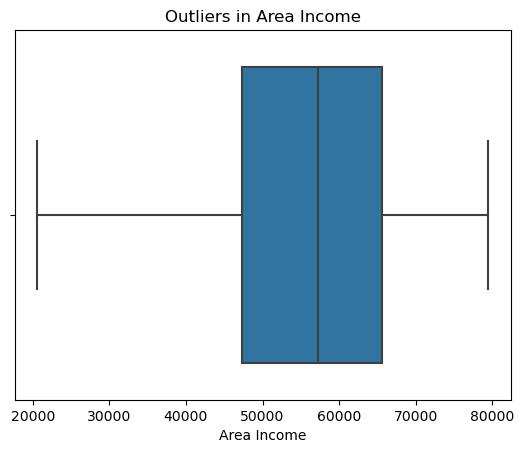

In [11]:
#Removed outliers boxplot
sns.boxplot(x= 'Area Income', data = df_cleaned)
plt.title('Outliers in Area Income')
plt.show()

This dataset shows that the outliers has been removed. 

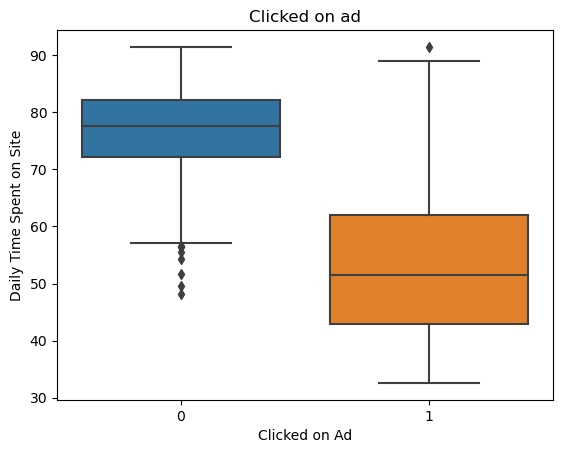

In [31]:
sns.boxplot(x='Clicked on Ad',y= 'Daily Time Spent on Site', data = df)
plt.title('Clicked on ad')
plt.show()

This dataset shows that people spent time on site more but they clicked on Ad very less. That means, approx half of the times they clicked on any Ad.  